In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('BID Historical Data.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


              Price     Open     High      Low   Vol. Change %
Date                                                          
2018-01-02  20664.3  19516.3  20664.3  19286.7  3.65M    5.88%
2018-01-03  20511.2  20664.3  20702.5  20281.6  3.09M   -0.74%
2018-01-04  21085.2  20511.2  21200.0  20319.9  5.56M    2.80%
2018-01-05  20970.4  21046.9  21085.2  20626.0  2.40M   -0.54%
2018-01-08  21314.8  21200.0  21582.7  20970.4  2.58M    1.64%


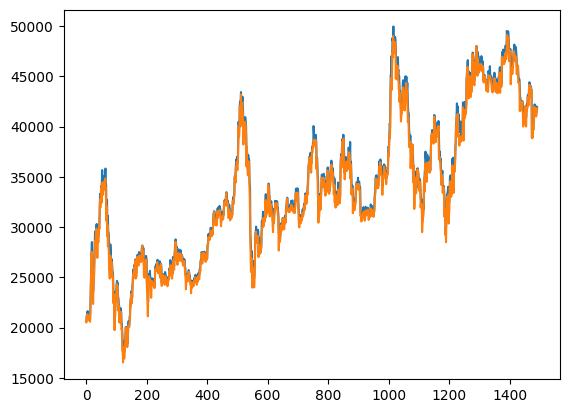

In [43]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = len(df) - train_size


X = df[['High']] # Biến độc lập theo mảng 2 chiều
Y = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều

plt.plot(X)
plt.plot(Y)
plt.show()



In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y[:train_size]
x_train = X[:train_size]
y_test = Y[train_size:]
x_test = X[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y[:train_size].values.ravel() #Chuyển đổi biến phụ thuộc y_train từ DataFrame thành một mảng 1 chiều để phù hợp với yêu cầu của mô hình SVR.

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 10, 'gamma': 'scale'}
Best score: 8841585.204396497


In [45]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([41367.00605258, 41367.00605258, 41461.55988908, 43400.38718128,
       43752.62024969, 43248.12528384, 43095.57638858, 43552.02917852,
       42588.62407577, 42993.86753918, 42588.62407577, 41652.36880091,
       44144.66827747, 43095.57638858, 43652.60083111, 44096.53908959,
       42943.04124369, 42943.04124369, 43501.57257482, 42337.9096868 ,
       41461.55988908, 40628.73525702, 40628.73525702, 40448.22832874,
       39108.05202716, 38653.98466931, 38284.49279767, 38237.87328442,
       38562.1740584 , 38097.42046626, 36795.82239944, 37041.31571322,
       36746.54093343, 37285.0559767 , 37236.46217749, 37718.52399005,
       37381.99751863, 36449.80231154, 35454.45926942, 35653.61898461,
       35354.97949116, 33591.16227234, 32872.72165627, 34026.3828237 ,
       35057.15832748, 34563.72749709, 34465.58059189, 34269.87856198,
       33446.88574472, 34662.06511558, 35305.27288   , 34958.14406659,
       35404.70904587, 35156.31234412, 35106.71875277, 34760.58644464,
      

In [46]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[41800.]])

In [47]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([40994.14103412]),
 array([40263.56341427]),
 array([39612.4819914]),
 array([39029.11561423]),
 array([38496.8723424]),
 array([38000.3375111]),
 array([37527.09152115]),
 array([37067.8189358]),
 array([36616.00340499]),
 array([36167.6391405]),
 array([35721.01222018]),
 array([35276.46657085]),
 array([34836.04095968]),
 array([34402.90930087]),
 array([33980.65759107]),
 array([33572.53732322]),
 array([33180.87739277]),
 array([32806.78029769]),
 array([32450.11302908]),
 array([32109.7057528]),
 array([31783.63914301]),
 array([31469.52552632]),
 array([31164.73420503]),
 array([30866.54950535]),
 array([30572.27198148]),
 array([30279.28161016]),
 array([29985.08273543]),
 array([29687.34856216]),
 array([29383.9803475]),
 array([29073.19332457])]

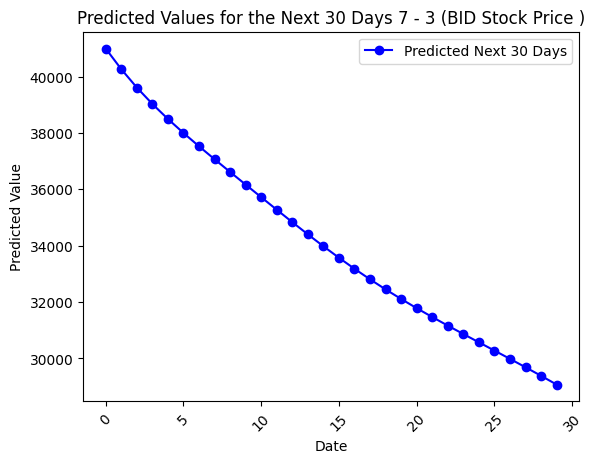

In [49]:

# Vẽ biểu đồ
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days 7 - 3 (BID Stock Price )')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [38]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [39]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred) * 100
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 219.5977413628034
Testing MAPE: 0.8861541228512956
Testing MAE: 158.86175103126658


In [40]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 219.5977413628034
Testing MAPE: 0.8861541228512956
Testing MAE: 158.86175103126658


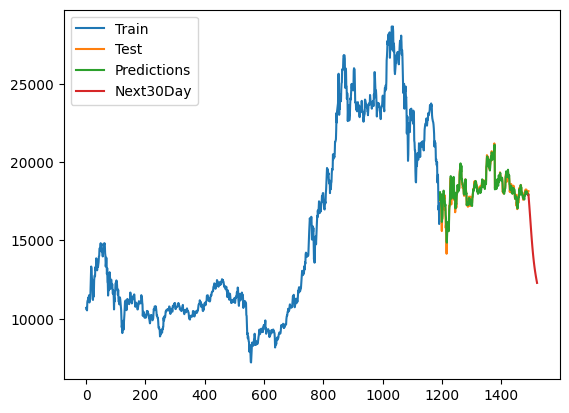

In [41]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred) * 100
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()